**Linear regression using OOP**

In [ ]:
#Modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.polynomial import polynomial as P
from sklearn.linear_model import LinearRegression #used to fit the linear regression model
from sklearn.model_selection import train_test_split  #used to split the data

In [ ]:
#importing the needed file
df = pd.read_csv('/content/drive/MyDrive/data/linregsample - Sheet1.csv')
x = df['X']
y = df['Y']


In [ ]:
#split the data into training and testing set
x_train,x_test,y_train,y_test  = train_test_split(x,y)
x_train=x_train.reset_index(drop=True)
x_test=x_test.reset_index(drop=True)
y_train=y_train.reset_index(drop=True)
y_test=y_test.reset_index(drop=True)


(0       84
 1       94
 2       37
 3       10
 4      292
       ... 
 220    215
 221      1
 222    276
 223    256
 224    220
 Name: X, Length: 225, dtype: int64,
 0       59.222220
 1       65.888890
 2       27.888890
 3        9.888889
 4      197.888900
           ...    
 220    146.555600
 221      3.888889
 222    187.222200
 223    173.888900
 224    149.888900
 Name: Y, Length: 225, dtype: float64)

In [ ]:
#function to calculate predicted y values
def prediction(w,b,x,y):
  y_pred = np.dot(x,w)+b
  return y_pred


In [ ]:
#function to calculate costfunction
def costfunction(w,b,x,y):
  m = x.shape[0]
  j =0
  for i in range(m):
    y_pred = prediction(w,b,x[i],y[i])
    dif = (y_pred -y[i])**2
    j = j + dif

  j = dif/(2*m)
  return j


49.925960762688895

In [ ]:
#function to calculate gradient of any value
def gradient(w,b,x,y):
  m,n = x.shape
  dj_dw = np.zeros((n,))
  dj_db = 0.
  for i in range(m):
    y_pred = prediction(w,b,x[i],y)
    error = (y_pred - y[i])
    for j in range(n):
      dj_dw[j] = dj_dw[j] + error*x[i][j]
    dj_db = dj_db + error
    #print(i,dj_dw,dj_db)
  dj_db = dj_db/m
  dj_dw = dj_dw/m
  return dj_dw,dj_db

#w1 = [0]
#b = 0
#tharak = gradient(w1,b,x_train,y_train)


(array([-19365.76759413]), -99.86815377333338)

In [ ]:
#function to calculate gdescent
import copy
def gradientdescent(w,b,x,y,alpha):
    dj_dw, dj_db = gradient(w,b,x,y)
    w = w - (alpha * dj_dw)
    b = b - (alpha * dj_db)
    return w,b

#w1 = [0]
#b = 0
#tharak = gradientdescent(w1,b,x_train,y_train,0.1)
#tharak

(array([1936.57675941]), 9.986815377333338)

In [ ]:
# function to keep calculating gradient descent for given no of iterations
def param(w_in,b_in,x,y,alpha,iter):
  w = copy.deepcopy(w_in)
  b = b_in
  for i in range(iter):
    w,b = gradientdescent(w,b,x,y,alpha)
    #l = costfunction(w,b,x,y)
    #print(i, l , w, b)
  return w,b

##w1 = [0]
#b1 = 0
#p,q = param(w1,b1,x_train,y_train,5e-7, 1000)


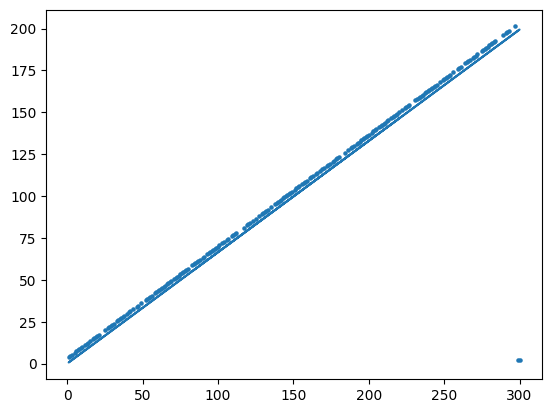

In [ ]:
plt.scatter(x_train,y_train, s= 5)
y_pred = prediction(p,q,x_train,y_train)
plt.plot(x_train, y_pred)

**Training model For new Data**

In [ ]:
newdf = pd.read_csv('/content/drive/MyDrive/data/Real estate.csv')
x = newdf.drop(['Y house price of unit area'], axis=1)
y = newdf[['Y house price of unit area']]
x_train,x_test,y_train,y_test = train_test_split(x,y)


In [ ]:
#split the data into training and testing set
x_train,x_test,y_train,y_test  = train_test_split(x,y)
x_train=x_train.reset_index(drop=True)
x_test=x_test.reset_index(drop=True)
y_train=y_train.reset_index(drop=True)
y_test=y_test.reset_index(drop=True)
x_train = x_train.drop(columns = ['No'])
x_train

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,2013.083,1.1,193.58450,6,24.96571,121.54089
1,2013.417,0.0,338.96790,9,24.96853,121.54413
2,2013.167,32.6,493.65700,7,24.96968,121.54522
3,2012.833,3.4,56.47425,7,24.95744,121.53711
4,2013.333,1.7,329.97470,5,24.98254,121.54395
...,...,...,...,...,...,...
305,2012.833,0.0,274.01440,1,24.97480,121.53059
306,2013.083,17.2,189.51810,8,24.97707,121.54308
307,2013.167,13.8,4082.01500,0,24.94155,121.50381
308,2013.417,20.3,287.60250,6,24.98042,121.54228


In [ ]:
# linitialising the parameters
w_in = np.array([0,0,0,0,0,0])
b_in = 0
x_train = np.array(x_train)
y_train = np.array(y_train)
x_train.shape


(310, 6)

In [ ]:
p,q = param(w_in, b_in, x_train, y_train,5e-10,12000)
y_pred_train = prediction(p,q,x_train,y_train)


In [ ]:
from sklearn.metrics import mean_squared_error,r2_score
r2_score(y_pred = y_pred_train,y_true = y_train)

0.46298837176364005

In [ ]:
qw = pd.DataFrame(x_train, columns = ['A','B','C','D','E','F'])
y_pred = prediction(p,q,x_train,y_train)
ad = pd.DataFrame(y_pred_train)
qw['y_pred'] = ad
ak = pd.DataFrame(y_train)
qw['y_true'] = ak

In [ ]:
qw


,A,B,C,D,E,F,y_pred,y_true
0,2013.083,1.1,193.58450,6.0,24.96571,121.54089,44.363724,54.4
1,2013.417,0.0,338.96790,9.0,24.96853,121.54413,43.338950,44.9
2,2013.167,32.6,493.65700,7.0,24.96968,121.54522,42.235102,40.6
3,2012.833,3.4,56.47425,7.0,24.95744,121.53711,45.332078,54.4
4,2013.333,1.7,329.97470,5.0,24.98254,121.54395,43.400552,50.4
...,...,...,...,...,...,...,...,...
305,2012.833,0.0,274.01440,1.0,24.97480,121.53059,43.786233,45.4
306,2013.083,17.2,189.51810,8.0,24.97707,121.54308,44.393187,47.1
307,2013.167,13.8,4082.01500,0.0,24.94155,121.50381,16.746566,20.0
308,2013.417,20.3,287.60250,6.0,24.98042,121.54228,43.703937,46.7


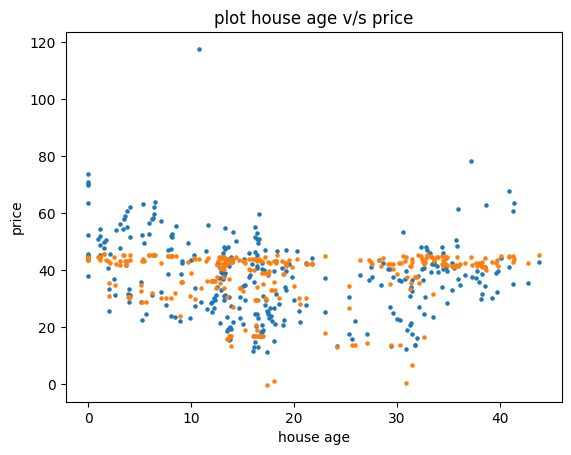

In [ ]:
#plotting the data between house age and price

plt.scatter(qw['B'],qw['y_true'], s =5,)
plt.scatter(qw['B'],qw['y_pred'],s =5 ,)
plt.xlabel("house age")
plt.ylabel("price")
plt.title("plot house age v/s price")
plt.show()

**testing the data**

In [ ]:
x_test = x_test.drop(columns = ['No'])
# linitialising the parameters
w_in = np.array([0,0,0,0,0,0])
b_in = 0
x_test = np.array(x_test)
y_test = np.array(y_test)
x_train.shape
y_pred_test = prediction(p,q,x_test,y_test)


In [ ]:
r2_score(y_pred = y_pred_test,y_true = y_test) #r2 is similar to r2 error that we got for the training set

0.4235636992112546